In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.models import Model

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
train_images = train_images/255
test_images = test_images/255
# train_images = train_labels.reshape(-1,)
# test_labels = test_labels.reshape(-1,)

In [ ]:
input = Input(shape=(32,32,3))
flatten = Flatten()(input)
dense4 = Dense(200, activation = 'relu')(flatten)
output = Dense(10, activation = 'softmax')(dense4)

model = Model(input, output)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 200)               614600    
                                                                 
 dense_5 (Dense)             (None, 10)                2010      
                                                                 
Total params: 616610 (2.35 MB)
Trainable params: 616610 (2.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels,batch_size=256 ,epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
196/196 [==============================] - 3s 16ms/step - loss: 1.3714 - accuracy: 0.5130 - val_loss: 1.4807 - val_accuracy: 0.4818
Epoch 2/10
196/196 [==============================] - 3s 17ms/step - loss: 1.3532 - accuracy: 0.5199 - val_loss: 1.4767 - val_accuracy: 0.4841
Epoch 3/10
196/196 [==============================] - 3s 14ms/step - loss: 1.3489 - accuracy: 0.5237 - val_loss: 1.4749 - val_accuracy: 0.4862
Epoch 4/10
196/196 [==============================] - 3s 14ms/step - loss: 1.3459 - accuracy: 0.5231 - val_loss: 1.4788 - val_accuracy: 0.4872
Epoch 5/10
196/196 [==============================] - 4s 18ms/step - loss: 1.3439 - accuracy: 0.5223 - val_loss: 1.4734 - val_accuracy: 0.4874
Epoch 6/10
196/196 [==============================] - 3s 14ms/step - loss: 1.3431 - accuracy: 0.5246 - val_loss: 1.4810 - val_accuracy: 0.4864
Epoch 7/10
196/196 [==============================] - 3s 13ms/step - loss: 1.3428 - accuracy: 0.5245 - val_loss: 1.4785 - val_accuracy: 0.4849

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.4787 - accuracy: 0.4892


[1.4787003993988037, 0.48919999599456787]

1/1 [==============================] - 0s 19ms/step
Original label:  deer 
Predicted label:  deer


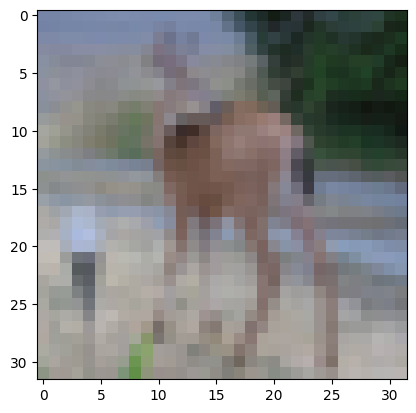

In [ ]:
image_number = 100
# print(test_labels[:5])
plt.imshow(test_images[image_number])
n = np.array(test_images[image_number])
p = n.reshape(1, 32, 32, 3)
original = int(test_labels[image_number])
# print(int(original))
original_label = classes[original]
predicted_label = classes[model.predict(p).argmax()]
print("Original label: ", original_label, "\nPredicted label: ", predicted_label)